# DCGAN
Paper: https://arxiv.org/pdf/1511.06434.pdf

In [1]:
!pip install array2gif

In [2]:
import torch
import torch.nn as nn
from torch.optim import Adam
import torchvision
import numpy as np
import matplotlib.pyplot as plt

class Generator(nn.Module):
  def __init__(self, latent_size = 100):
    super(Generator, self).__init__()

    self.layers = nn.Sequential(nn.ConvTranspose2d(latent_size, 1024, 4,1,0,bias=False),
                           nn.BatchNorm2d(1024),
                           nn.ReLU(True),
                           # 4x4
                           nn.ConvTranspose2d(1024, 512, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(512),
                           nn.ReLU(True),
                           # 8x8
                           nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(256),
                           nn.ReLU(True),
                           # 16 x 16
                           nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(128),
                           nn.ReLU(True),
                           # 32 x 32
                           nn.ConvTranspose2d(128, 1, 4, 2, 1, bias=False),
                           nn.Tanh()
                           # 64 x 64
                           )
  def __call__(self, latent_space):
      return self.forward(latent_space)
    
  def forward(self, latent_space):
      return self.layers(latent_space.cuda())
       


class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    # 64x64
    self.layers = nn.Sequential(nn.Conv2d(1, 128, 4,2,1,bias=False),
                           nn.LeakyReLU(0.2, inplace=True),
                           # 32x32
                           nn.Conv2d(128, 256, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(256),
                           nn.LeakyReLU(0.2, inplace=True),
                           # 16 x 16
                           nn.Conv2d(256, 512, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(512),
                           nn.LeakyReLU(0.2, inplace=True),
                           # 8 x 8
                           nn.Conv2d(512, 1024, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(1024),
                           nn.LeakyReLU(0.2, inplace=True),
                           # 4 x 4
                           nn.Conv2d(1024, 1, 4, 1, 0, bias=False),
                           nn.Sigmoid()
                           # 1 x 1
                          )
  def __call__(self, img):
      return self.forward(img)
    
  def forward(self, img):
      return self.layers(img.cuda())


In [3]:
def plot_epoch(images, n=36):
    '''  
    Visualize a single epoch of images
    Parameters
    ----------
    images : numpy.ndarray
             images of shape (b, c, x, y)
    n      : int, default: 36
             number of images to display. Must be a square number
    ''' 

    if not isinstance(images, np.ndarray):
        images = images.detach().numpy()

    rowcols = np.sqrt(n) 
    plt.figure(figsize=(rowcols, rowcols))
    for index in range(n):
        plt.subplot(rowcols, rowcols, index + 1)
        plt.imshow(images[index, 0, :, :], cmap="binary")
        plt.axis("off")
    plt.show()

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /root/datasets/MNIST/raw/train-images-idx3-ubyte.gz to /root/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /root/datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /root/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /root/datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /root/datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/datasets/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Device is: cuda
Epoch [0/10], Step [80/468], d_loss: 0.0159, g_loss: 9.7661, D(x): 0.99, D(G(z)): 0.01


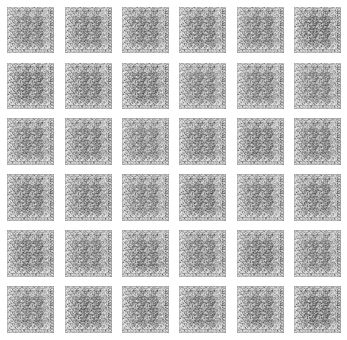

Epoch [0/10], Step [160/468], d_loss: 0.0024, g_loss: 9.1316, D(x): 1.00, D(G(z)): 0.00


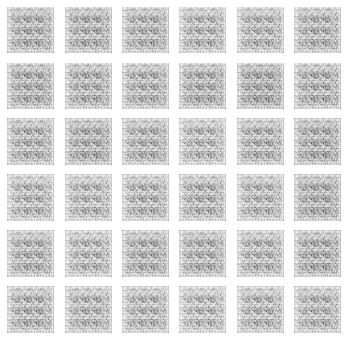

Epoch [0/10], Step [240/468], d_loss: 0.0019, g_loss: 9.1888, D(x): 1.00, D(G(z)): 0.00


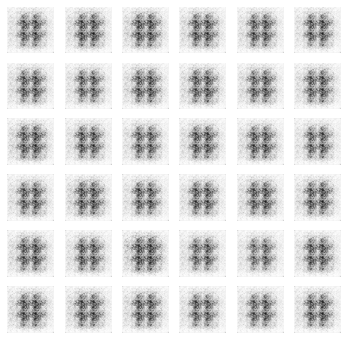

Epoch [0/10], Step [320/468], d_loss: 0.0012, g_loss: 9.9036, D(x): 1.00, D(G(z)): 0.00


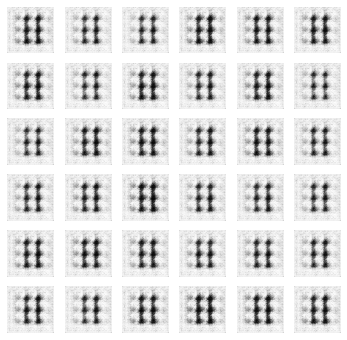

Epoch [0/10], Step [400/468], d_loss: 0.0095, g_loss: 8.6803, D(x): 0.99, D(G(z)): 0.00


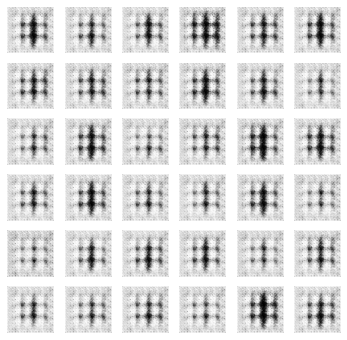

Epoch [1/10], Step [80/468], d_loss: 0.0211, g_loss: 8.3982, D(x): 0.99, D(G(z)): 0.01


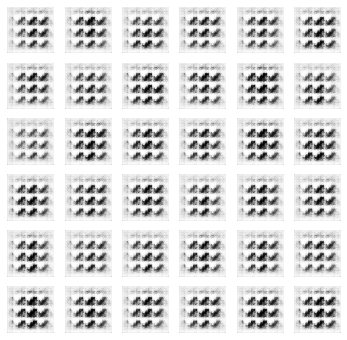

Epoch [1/10], Step [160/468], d_loss: 0.0048, g_loss: 7.3139, D(x): 1.00, D(G(z)): 0.00


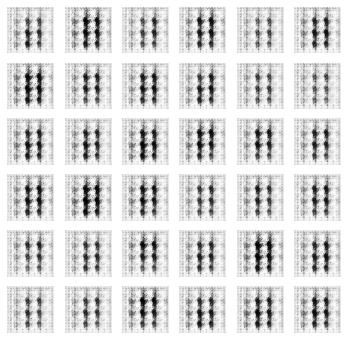

Epoch [1/10], Step [240/468], d_loss: 0.0216, g_loss: 6.8003, D(x): 0.99, D(G(z)): 0.01


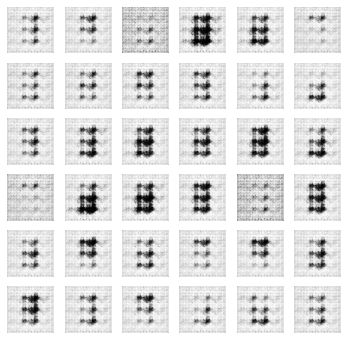

Epoch [1/10], Step [320/468], d_loss: 0.0208, g_loss: 6.3053, D(x): 1.00, D(G(z)): 0.01


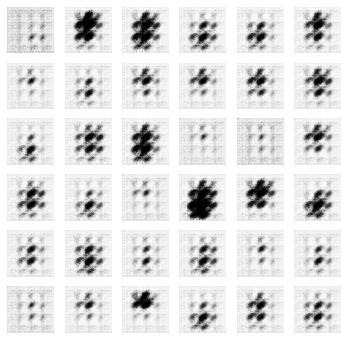

Epoch [1/10], Step [400/468], d_loss: 0.0641, g_loss: 6.4932, D(x): 0.97, D(G(z)): 0.01


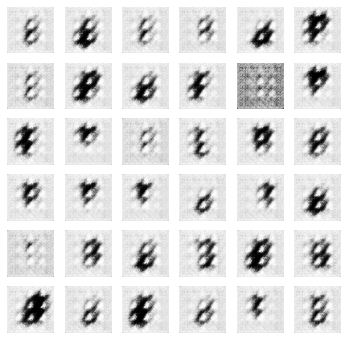

Epoch [2/10], Step [80/468], d_loss: 0.0031, g_loss: 7.1870, D(x): 1.00, D(G(z)): 0.00


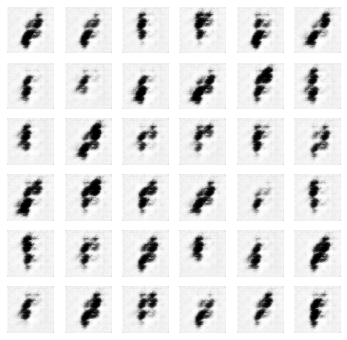

Epoch [2/10], Step [160/468], d_loss: 0.0097, g_loss: 10.0105, D(x): 0.99, D(G(z)): 0.00


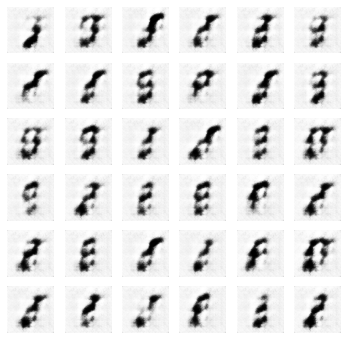

Epoch [2/10], Step [240/468], d_loss: 0.0120, g_loss: 6.9054, D(x): 0.99, D(G(z)): 0.00


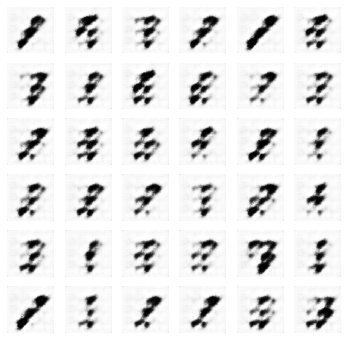

Epoch [2/10], Step [320/468], d_loss: 0.0065, g_loss: 8.0505, D(x): 1.00, D(G(z)): 0.00


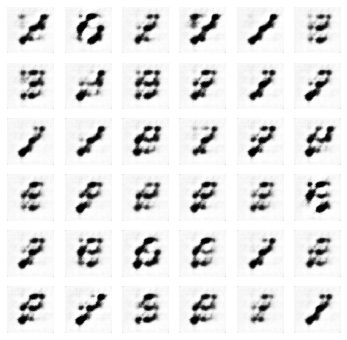

Epoch [2/10], Step [400/468], d_loss: 0.0059, g_loss: 7.0768, D(x): 1.00, D(G(z)): 0.00


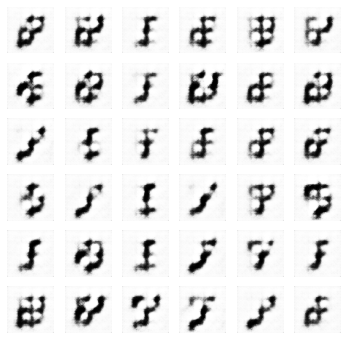

Epoch [3/10], Step [80/468], d_loss: 0.0072, g_loss: 11.4182, D(x): 1.00, D(G(z)): 0.00


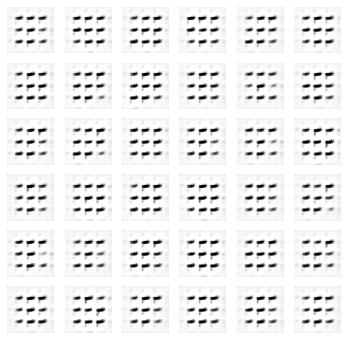

Epoch [3/10], Step [160/468], d_loss: 0.0619, g_loss: 6.8545, D(x): 0.97, D(G(z)): 0.01


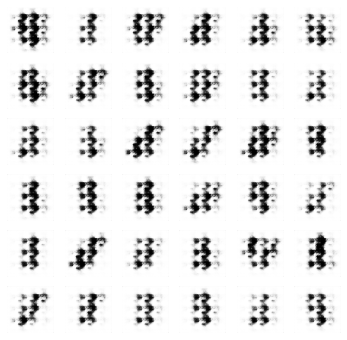

Epoch [3/10], Step [240/468], d_loss: 0.0470, g_loss: 4.8539, D(x): 0.97, D(G(z)): 0.01


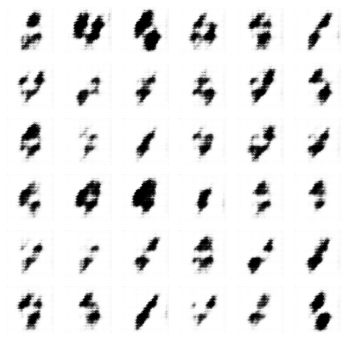

Epoch [3/10], Step [320/468], d_loss: 0.0096, g_loss: 6.5611, D(x): 0.99, D(G(z)): 0.00


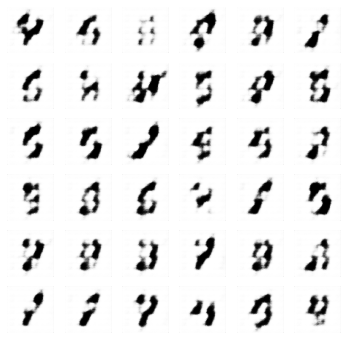

Epoch [3/10], Step [400/468], d_loss: 0.0051, g_loss: 6.9284, D(x): 1.00, D(G(z)): 0.00


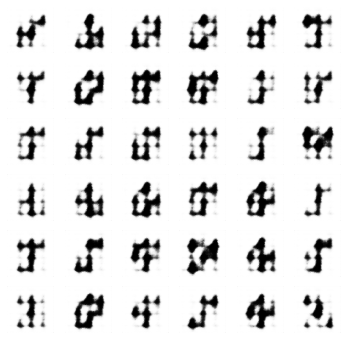

Epoch [4/10], Step [80/468], d_loss: 0.0308, g_loss: 6.5739, D(x): 0.97, D(G(z)): 0.00


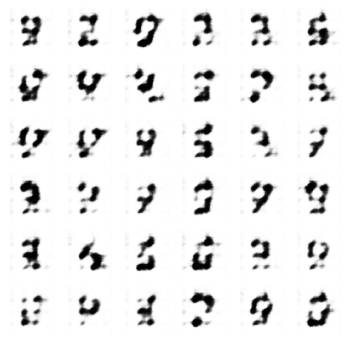

Epoch [4/10], Step [160/468], d_loss: 0.0176, g_loss: 10.1672, D(x): 1.00, D(G(z)): 0.01


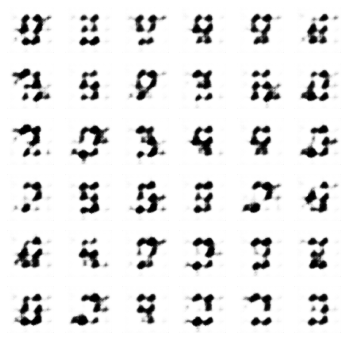

Epoch [4/10], Step [240/468], d_loss: 0.0072, g_loss: 9.1193, D(x): 1.00, D(G(z)): 0.01


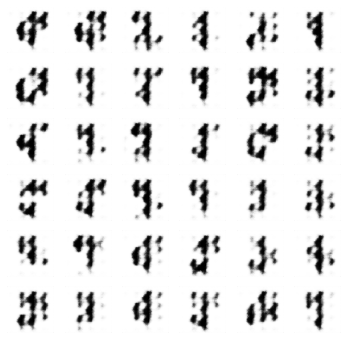

Epoch [4/10], Step [320/468], d_loss: 0.0113, g_loss: 7.0615, D(x): 1.00, D(G(z)): 0.01


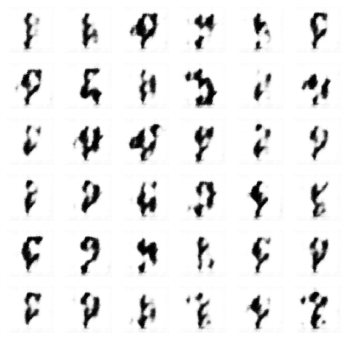

Epoch [4/10], Step [400/468], d_loss: 0.1077, g_loss: 4.4809, D(x): 0.93, D(G(z)): 0.01


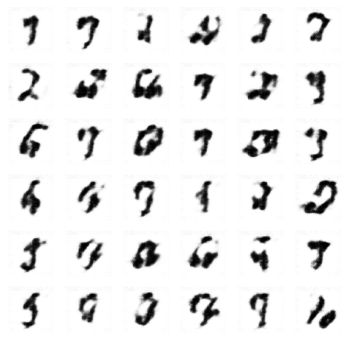

Epoch [5/10], Step [80/468], d_loss: 0.1248, g_loss: 5.1117, D(x): 1.00, D(G(z)): 0.10


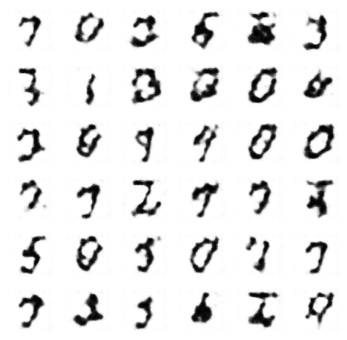

Epoch [5/10], Step [160/468], d_loss: 0.0269, g_loss: 8.9015, D(x): 0.99, D(G(z)): 0.02


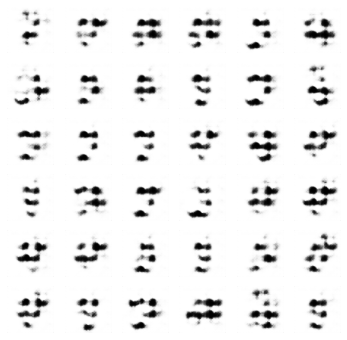

Epoch [5/10], Step [240/468], d_loss: 0.0136, g_loss: 6.8622, D(x): 0.99, D(G(z)): 0.01


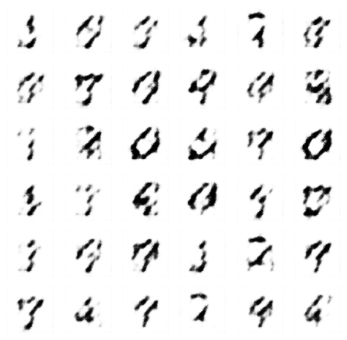

Epoch [5/10], Step [320/468], d_loss: 0.0528, g_loss: 6.6797, D(x): 0.96, D(G(z)): 0.00


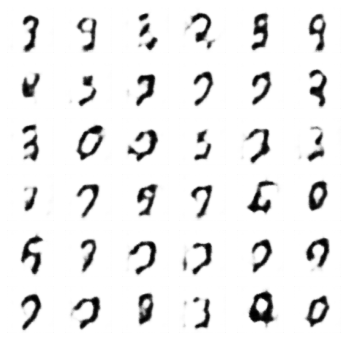

Epoch [5/10], Step [400/468], d_loss: 0.0325, g_loss: 6.2637, D(x): 0.99, D(G(z)): 0.02


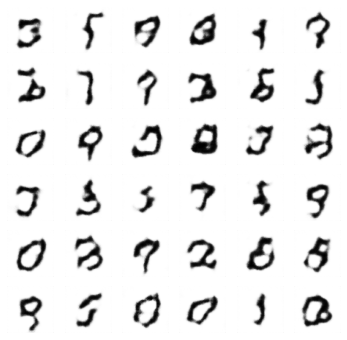

Epoch [6/10], Step [80/468], d_loss: 0.0462, g_loss: 5.4183, D(x): 0.98, D(G(z)): 0.02


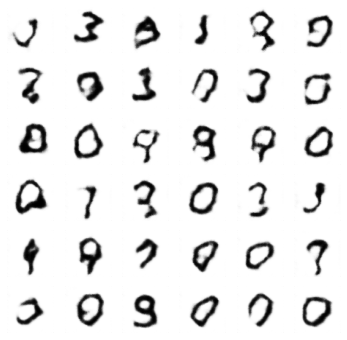

Epoch [6/10], Step [160/468], d_loss: 0.1017, g_loss: 5.0496, D(x): 0.93, D(G(z)): 0.00


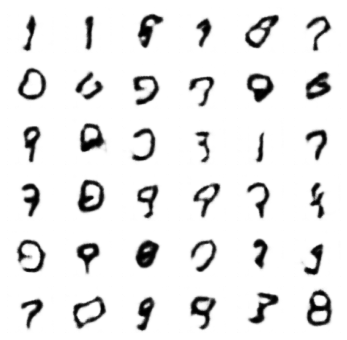

Epoch [6/10], Step [240/468], d_loss: 1.5183, g_loss: 2.1577, D(x): 1.00, D(G(z)): 0.54


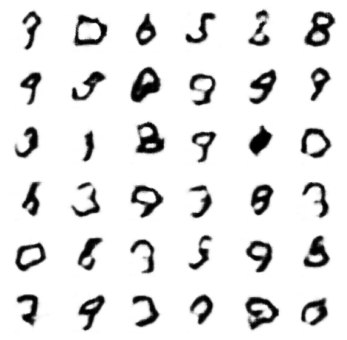

Epoch [6/10], Step [320/468], d_loss: 0.0580, g_loss: 5.3066, D(x): 0.98, D(G(z)): 0.03


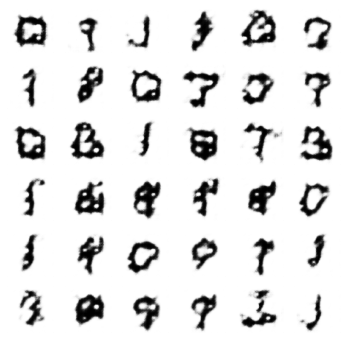

Epoch [6/10], Step [400/468], d_loss: 0.0316, g_loss: 5.7290, D(x): 0.98, D(G(z)): 0.01


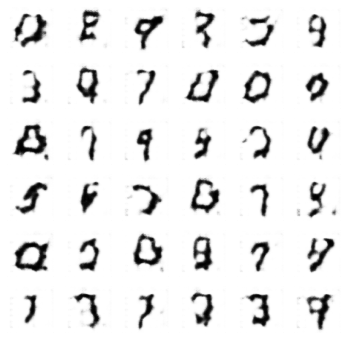

Epoch [7/10], Step [80/468], d_loss: 0.0815, g_loss: 4.2030, D(x): 1.00, D(G(z)): 0.07


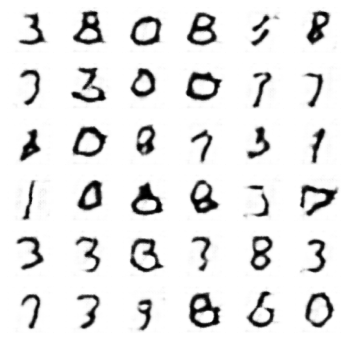

Epoch [7/10], Step [160/468], d_loss: 0.0476, g_loss: 4.7304, D(x): 0.98, D(G(z)): 0.02


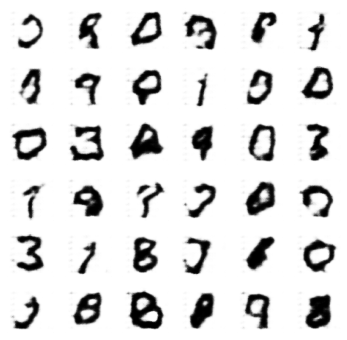

Epoch [7/10], Step [240/468], d_loss: 0.0459, g_loss: 3.5871, D(x): 0.98, D(G(z)): 0.02


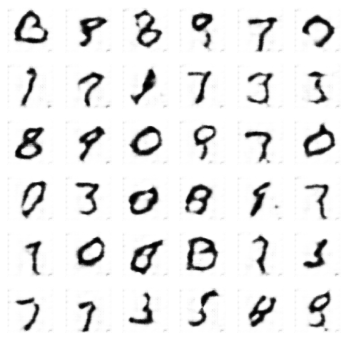

Epoch [7/10], Step [320/468], d_loss: 0.1415, g_loss: 3.9233, D(x): 0.99, D(G(z)): 0.11


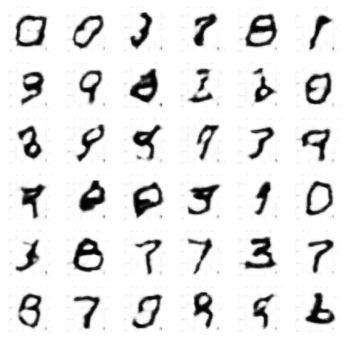

Epoch [7/10], Step [400/468], d_loss: 0.1112, g_loss: 5.8131, D(x): 0.91, D(G(z)): 0.00


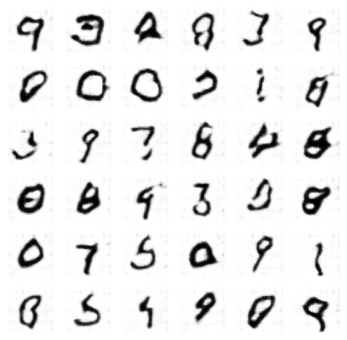

Epoch [8/10], Step [80/468], d_loss: 0.0666, g_loss: 3.9480, D(x): 0.98, D(G(z)): 0.04


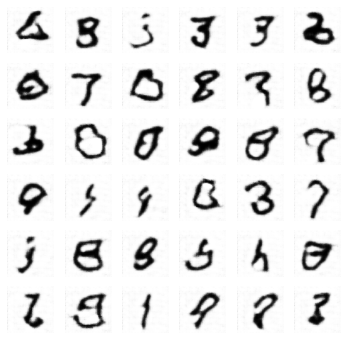

Epoch [8/10], Step [160/468], d_loss: 0.2612, g_loss: 3.5708, D(x): 0.82, D(G(z)): 0.00


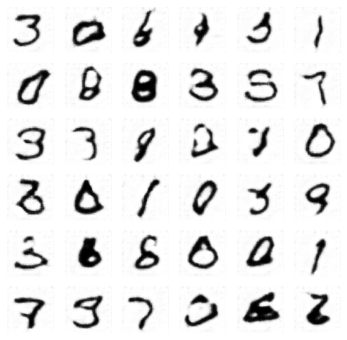

Epoch [8/10], Step [240/468], d_loss: 0.1454, g_loss: 4.4007, D(x): 0.99, D(G(z)): 0.11


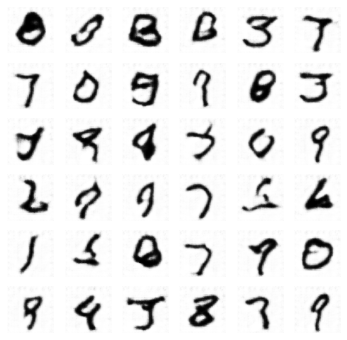

Epoch [8/10], Step [320/468], d_loss: 0.0711, g_loss: 4.5848, D(x): 1.00, D(G(z)): 0.06


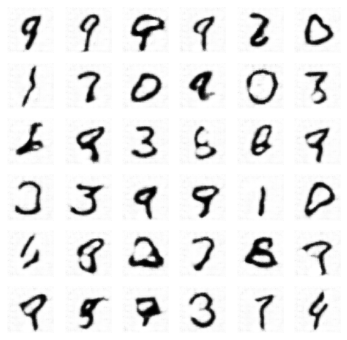

Epoch [8/10], Step [400/468], d_loss: 0.0656, g_loss: 5.1285, D(x): 0.98, D(G(z)): 0.04


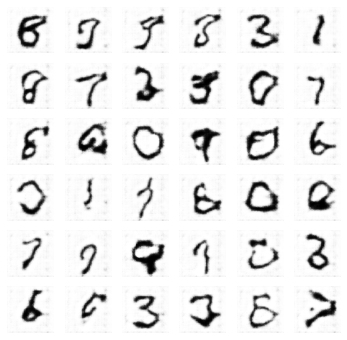

Epoch [9/10], Step [80/468], d_loss: 0.0518, g_loss: 5.2965, D(x): 0.99, D(G(z)): 0.04


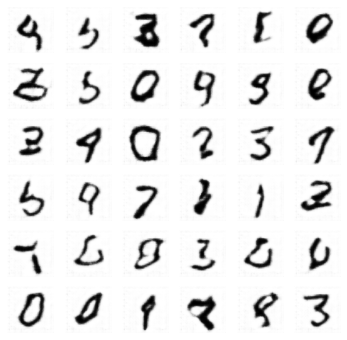

Epoch [9/10], Step [160/468], d_loss: 0.0406, g_loss: 5.0459, D(x): 0.98, D(G(z)): 0.02


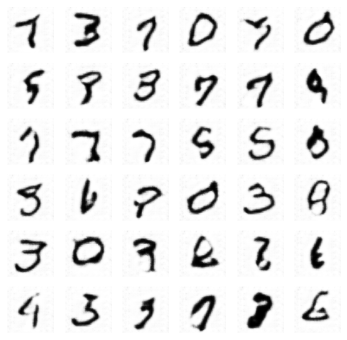

Epoch [9/10], Step [240/468], d_loss: 0.0671, g_loss: 4.7229, D(x): 0.96, D(G(z)): 0.02


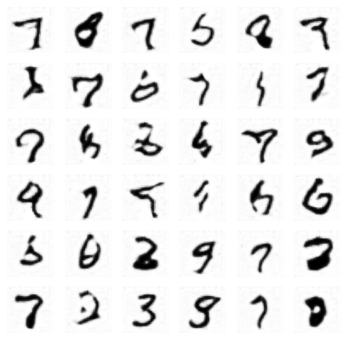

Epoch [9/10], Step [320/468], d_loss: 0.1102, g_loss: 5.4168, D(x): 1.00, D(G(z)): 0.09


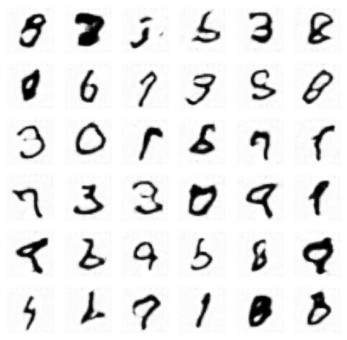

Epoch [9/10], Step [400/468], d_loss: 0.1221, g_loss: 5.0661, D(x): 0.92, D(G(z)): 0.02


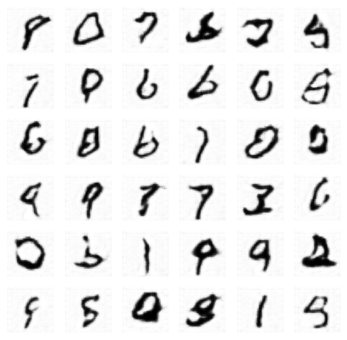

In [4]:
import sys
import os
from torchvision import transforms
from torch.optim import Adam
from torchvision.datasets import MNIST
from array2gif import write_gif

LATENT_SIZE = 100
EPOCH_SIZE  = 10
ROW_NUM     = 6
try:
  data_path = os.path.join(os.path.abspath(os.environ["CONDA_PREFIX"]),
                          'datasets')
except KeyError:
    data_path = os.path.join(os.path.abspath(os.environ["HOME"]),
                         'datasets')
# We make sure that the dataset is actually available
try:
    torchvision.datasets.MNIST(root=data_path,
                               download=False)
except RuntimeError or KeyError:
    if not os.path.isdir(data_path):
            os.makedirs(data_path)
    torchvision.datasets.MNIST(root=data_path,
                               download=True)

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)


dataset = torchvision.datasets.MNIST(root=data_path,download=True)
dataset.transform = transforms.Compose([transforms.ToTensor(), 
                                        transforms.Normalize(mean = (0.5,), 
                                                             std = (0.5,)),
                                        transforms.Resize(64)])


# Data Loader
batch_size = 128
data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                          batch_size=batch_size,
                                          shuffle=True, drop_last=True)
# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device is: " + str(device))

criterion = nn.BCELoss()

discriminator = Discriminator().to(device).apply(weights_init)
generator     = Generator().to(device).apply(weights_init)

optim_d = Adam(discriminator.parameters(), lr = 0.00005)
optim_g = Adam(generator.parameters(),     lr = 0.00005)

gif_array = []*EPOCH_SIZE
total_step = len(data_loader)
for epoch in range(EPOCH_SIZE):
    for step, (imgs, _) in enumerate(data_loader):

        # Create Fake and Real Labels
        real_labels = torch.ones(batch_size, 1,1,1).to(device)
        fake_labels = torch.zeros(batch_size, 1,1,1).to(device)

        # ================================================================== #
        #                      Train the discriminator                       #
        # ================================================================== #
        outputs     = discriminator(imgs)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        # BCE on fake images
        lat_space   = torch.randn(batch_size, LATENT_SIZE, 1, 1).to(device)
        fake_images = generator(lat_space)
        outputs     = discriminator(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score  = outputs

        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        optim_d.zero_grad()
        optim_g.zero_grad()
        d_loss.backward()
        optim_d.step()

        # ================================================================== #
        #                        Train the generator                         #
        # ================================================================== #

        # Compute loss with fake images
        lat_space = torch.randn(batch_size, LATENT_SIZE, 1, 1).to(device)
        fake_images = generator(lat_space)
        outputs = discriminator(fake_images)

        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
        g_loss = criterion(outputs, real_labels)

        # Backprop and optimize
        optim_d.zero_grad()
        optim_g.zero_grad()
        g_loss.backward()
        optim_g.step()
        
        if (step+1) % 80 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                    .format(epoch, EPOCH_SIZE, 
                            step+1, total_step, 
                            d_loss.item(), 
                            g_loss.item(), 
                            real_score.mean().item(), 
                            fake_score.mean().item()))
            plot_epoch(fake_images.cpu())
            array_2_make_grid = ((fake_images.cpu()[0:ROW_NUM**2, :, :, :] + 1) * (1/2) * 255).type(torch.uint8)
            gif_array.append(torchvision.utils.make_grid(array_2_make_grid, nrow = ROW_NUM).numpy())
            write_gif(gif_array, filename = 'dcgan_10_fps.gif', fps = 10)

In [ ]:
write_gif(gif_array, filename = 'dcgan_5_fps.gif', fps = 5)

# New Section